# ELG7113 Machine Learning for Adaptive and Intelligent Control Systems

Student: Derek Boase

Std Num: 300043860

e-mail: dboas065@uottawa.ca

assignment GitHub: git@github.com:derekboase/Adaptive_Control_Code.git

In [ ]:
import matplotlib.pyplot as plt
import control as co  # pip install control
import numpy as np  
import sympy as sp

from numpy import cos, sin, pi

## Question 1


Question declarations:

In [ ]:
r1, s0, s1, a01 = sp.symbols('r_1, s_0, s_1, a_0_1')
a, b, c, d, s = sp.symbols('a, b, c, d, s')
y, u, uc = sp.symbols('y, u, u_c')
a_true, b_true, c_true, d_true = (1, 1, 2, 1/2)
G1 = b/(s + a)
G2 = c/(s + d)
G = sp.Mul(G1, G2)
Am = s ** 2 + 2*s + 1

In [ ]:
G

a) Design control parameters using the Diophantine equation

Using the compatability conditions: 
$$\text{degA}_m=\text{degA}=2$$
$$\text{degB}_m=\text{degB}=0$$
$$\text{degA}_0=\text{degA - degB}^+-1=1$$

The causality condition gives, 
$$\text{degA}_m - \text{degB}_m'\geq\text{degA} - \text{degB}^+$$

Given that $$\text{degA}_m=\text{degA}=2$$ and $$\text{degB}_m'=0$$ then $$\text{degB}^+=0$$

With this we can find, 
$$\text{degA}_c = \text{degA}_o + \text{degA}_m + \text{degB}^+ = 3$$

It is then found that, 
$$\text{degR} = \text{degA}_c - \text{degA} = 3 - 2 = 1$$
Using the minimum phase relationship, 
$$\text{degR}=\text{degT}=\text{degS}=1$$

The control parameters may then be found using the Diophantine equation, 
$$AR' + B^-S = A_0A_m$$
$$(s^2 + (a + d)s + ad)(s + r_1) + bc(s_0s + s_1) = (s + a_{o_1})(s^2 + 2s + 1)$$

The left hand side of the Diophantine equation becomes,

In [ ]:
n, denum = sp.fraction(G)
LHS = denum * (s + r1) + b*c*(s0*s + s1)
LHS = sp.collect(sp.expand(LHS), s)
LHS

The right hand side becomes,

In [ ]:
RHS = sp.collect(sp.expand((s + a01)*(s ** 2 + 2*s + 1)), s)
RHS

In [ ]:
dio = sp.collect(LHS - RHS, s)
dio_poly = sp.Poly(dio, s)
dio

Using the $s^2$ terms, 

In [ ]:
r1_sym = sp.solve(dio_poly.coeffs()[0], r1)[0]
r1_sym

Substituting the known values, 

In [ ]:
r1_sym.subs(a, 1).subs(b, 1)

Recalling that the R term of the controller is monic, it can then be written as,

$$R = -a + a_{0_1} - d + 2 = s + a_{0_1} - d + 1$$

Collecting the s terms we get, 

In [ ]:
s0_sym = sp.solve(dio_poly.coeffs()[1], s0)[0]
s0_sym

Substituting for the known values gives, 

In [ ]:
s0_sym.subs(a, 1).subs(b, 1)

Collecting the terms that are constant in s, 

In [ ]:
s1_sym = sp.solve(dio_poly.coeffs()[2], s1)[0]
s1_sym.subs(a, 1).subs(b, 1)

# Question 2

In [1]:
import matplotlib.pyplot as plt
import control as co
import numpy as np
import sympy as sp

from numpy import transpose as trans
from numpy import cos, sin, pi
from numpy.linalg import inv

Question Parameters

In [2]:
a1, a2, b0, b1 = sp.symbols('\hat{a}_1, \hat{a}_2, \hat{b}_0, \hat{b}_1')
r1, s0, s1, a0 = sp.symbols('r_1, s_0, s_1, a_0')
am1, am2 = sp.symbols('a_{m1}, a_{m2}')
y, u, uc = sp.symbols('y, u, u_c')
q = sp.symbols('q')

In [3]:
# A = (q**2 - 0.503215*q + 0.0497871)
# B = (1.59831*q + 0.587984)
A = (q**2 + a1*q + a2)
B = (b0*q + b1)
B_poly = sp.Poly(B, q)

H = B/A
B_plus = (q + B_poly.coeffs()[1]/B_poly.coeffs()[0])
B_minus = B_poly.coeffs()[0]
H

(\hat{b}_0*q + \hat{b}_1)/(\hat{a}_1*q + \hat{a}_2 + q**2)

In [4]:
# Am_test = co.sample_system(co.tf([1.], [1., 2., 1.]), Ts=2, method='zoh')
# Am = q**2 - 0.2707*q + 0.01832
Am = q**2 + am1*q + am2
Am

a_{m1}*q + a_{m2} + q**2

In [5]:
Am_test = co.sample_system(co.tf([1.], [1., 2., 1.]), Ts=2, method='zoh')
Am_test

TransferFunction(array([0.59399415, 0.15365092]), array([ 1.        , -0.27067057,  0.01831564]), 2)

## 2.2 Indirect Linear Controller Design Using MDPP 

### Step 1
We begin by factorizing B as follows, 

$$ B = B(q)^+B(q)^- = (q + 0.36788)(1.59831) $$

To cancel the zeros, we require that they are stable and well-damped. In this case the zero is q = -0.36788 and is thus stable (inside the unit circle) and well-damped (sufficiently far from the unit circle). It is then clear that we may cancel the zeros. 

Using the compatability conditions: 
$$ \text{deg}A_m = \text{deg}A = 2 $$
$$ \text{deg}B_m = \text{deg}B = \text{degB}^+ = 1 $$
$$ \text{deg}A_0=\text{deg}A - \text{deg}B^+-1=0 $$

With this we can find, 
$$ \text{deg}A_c = \text{deg}A_o + \text{deg}A_m + \text{deg}B^+ = 3 $$

From the minimum phase conditions we then get that, 

$$  \text{deg}R = \text{deg}S = \text{deg}T = \text{deg}A_c - \text{deg}A = 1 $$

### Step 2
Noting that $ \text{deg}R= 1 $ and $ \text{deg}B^+ = 1 $ then it follows that 
$$ \text{deg}R' = 0 $$

Let $ R' = 1 $, then the left hand side (LHS) of the Diophatine equation becomes, 
$$ \text{LHS} = AR' + B^-S $$

In [6]:
LHS = A + B_minus*(s0*q + s1)
sp.collect(sp.expand(LHS), q)

\hat{a}_2 + \hat{b}_0*s_1 + q**2 + q*(\hat{a}_1 + \hat{b}_0*s_0)

From the compatability conditions, we get the $ \text{deg}A_o = 0 $, thus we choose it to be, 
$$ A_o = 1 $$
The right hand side (RHS) of the Diophantine equation becomes, 
$$ \text{RHS} = A_oA_m $$

In [7]:
RHS = Am
RHS

a_{m1}*q + a_{m2} + q**2

In [8]:
dio_poly = sp.Poly(sp.collect(LHS - RHS, q), q)
dio_poly.coeffs()

[\hat{a}_1 + \hat{b}_0*s_0 - a_{m1}, \hat{a}_2 + \hat{b}_0*s_1 - a_{m2}]

To find $ s_0 $ we consider the first degree terms,

In [9]:
s0_sym = sp.solve(dio_poly.coeffs()[0], s0)[0]
s0_sym

(-\hat{a}_1 + a_{m1})/\hat{b}_0

To find $ s_1 $ we consider the equations that are constant in q, 

In [10]:
s1_sym = sp.solve(dio_poly.coeffs()[1], s1)[0]
S = (s0_sym*q + s1_sym)
R = B_plus
s1_sym

(-\hat{a}_2 + a_{m2})/\hat{b}_0

With this the $ S $ polynomial is,

$ S = $ {{S}}


In [11]:
r1_sym = b1/b0
r1_sym

\hat{b}_1/\hat{b}_0

Additionally, we know that, $ R = R'B^+ $ and that $ R' = 1 $ thus, 

$ R = B^+ =$ {{B_plus}}

The $R$ polynomial is given as, 

$R = ${{R}}

The T polynomial is found using, 
$$ T = A_oB_m' $$
where $ B_m = B^-B_m' = A_m(1)q^{n - d_0} $

In [12]:
Bm = Am.subs(q, 1)*q
t0_sym = Bm/B_minus
T = t0_sym

Then $T$ is, 

$ T = $ {{T}}

As a summary, the control polynomials are given by, 

$ R = $ {{R}}

$ S = $ {{S}}

$ T = $ {{T}}

## 2.3-4 Minimal Degree Pole Placement Algorithm for Indirect Controller and Simulation

In [85]:
def reference_signal(time=np.linspace(0, 100, 101)):
    sig = []
    rat = 2.0/40.0*pi
#     rat = 1.0/25.0*pi
    for t_lop in time:
        if sin(rat*t_lop) >= 0:
            sig.append(1)
        else:
            sig.append(0)
    return np.array(sig, dtype=float)

def noise_generator(time=np.linspace(0, 100, 101)):
    noise = []
    for t_lop in time:
        if t_lop < 35:
            noise.append(0)
        else: 
            noise.append(0.25)
    return np.array(noise)

We start by initializing the values of the variables, 

In [86]:
uc = reference_signal()
lam = 1

# Assignmnent, works
am1 = -2*np.exp(-2)
am2 = np.exp(-4)
a1_true, a2_true, b0_true, b1_true = -0.503215, 0.0497871, 1.59831, 0.587984

# # In class example, works perfectly!
# am1 = -1.3205
# am2 = 0.4966
# a1_true, a2_true, b0_true, b1_true = -1.6065, 0.6065, 0.1065, 0.0902

theta = np.array([a1_true, a2_true, b0_true, b1_true]).reshape(4,1)  # a1[0], a2[1], b0[2], b1[3]

In [115]:
# Initializing the coefficients for A, B for t = 0
theta_hat = np.array([0., 0., 0.5, 0.2]).reshape(4,1)  # a1[0], a2[1], b0[2], b1[3]  ** SET b0 TO 0.01 FOR CONVERGENCE**
a1_est, a2_est, b0_est, b1_est = theta_hat[0], theta_hat[1], theta_hat[2], theta_hat[3]
P = np.diag([10, 1, 100, 10])  # WORKS 
# P = np.diag([100, 100, 100, 100])  # WORKS 

# Calculating the control parameters for t = 0
y = np.array([0])
y_hat = y
t0 = (am1 + am2 + 1)/theta_hat[2]
s0 = (am1 - theta_hat[0])/theta_hat[2]
u = t0*uc[0] - s0*y[0]

# Calculating the coefficients for A, B for t = 1
# phi = np.array([-y[0], 0, u[0], 0]).reshape(4,1)
phi = np.array([0., 0., 0., 0.]).reshape(4,1)
y = np.concatenate((y, 
                    (trans(phi) @ theta).reshape(-1)), axis=0)

K = P @ phi @ inv(lam + trans(phi) @ P @ phi)
theta_hat = theta_hat + K @ (y[1] - trans(phi) @ theta_hat)
P = (np.eye(len(phi)) - K @ trans(phi)) @ P /lam

a1_est = np.concatenate((a1_est, theta_hat[0]), axis=0)
a2_est = np.concatenate((a2_est, theta_hat[1]), axis=0)
b0_est = np.concatenate((b0_est, theta_hat[2]), axis=0)
b1_est = np.concatenate((b1_est, theta_hat[3]), axis=0)

# Calculating the control parameters for t = 1
r1 = theta_hat[3]/theta_hat[2]
t0 = (am1 + am2 + 1)/theta_hat[2]
s0 = (am1 - theta_hat[0])/theta_hat[2]
s1 = (am2 - theta_hat[1])/theta_hat[2]
u = np.concatenate((u, 
                    -r1*u[0] + t0*uc[1] - s0*y[1] - s1*y[0]))

for t in np.arange(2, 101): 
    # Calculating the coefficients for A, B for t 
    phi = np.array([-y[t-1], -y[t-2], u[t-1], u[t-2]]).reshape(4,1)
    y = np.concatenate((y, 
                    (trans(phi) @ theta).reshape(-1)), axis=0)
    K = P @ phi @ inv(lam + trans(phi) @ P @ phi)
    theta_hat += K @ (y[t] - trans(phi) @ theta_hat)
    P = (np.eye(len(phi)) - K @ trans(phi)) @ P /lam
    a1_est = np.concatenate((a1_est, theta_hat[0]), axis=0)
    a2_est = np.concatenate((a2_est, theta_hat[1]), axis=0)
    b0_est = np.concatenate((b0_est, theta_hat[2]), axis=0)
    b1_est = np.concatenate((b1_est, theta_hat[3]), axis=0)
    
    # Calculating the control parameters for t 
    r1 = theta_hat[3]/theta_hat[2]
    t0 = (am1 + am2 + 1)/theta_hat[2]
    s0 = (am1 - theta_hat[0])/theta_hat[2]
    s1 = (am2 - theta_hat[1])/theta_hat[2]
    u = np.concatenate((u, 
                        -r1*u[t-1] + t0*uc[t] - s0*y[t] - s1*y[t-1]))

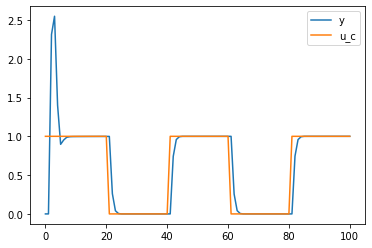

In [116]:
plt.plot(np.linspace(0, 100, 101), y)
plt.plot(np.linspace(0, 100, 101), uc)
# plt.plot(y[45:60])
# plt.plot(uc[45:60])
plt.legend(['y',
            'u_c'])
plt.show()

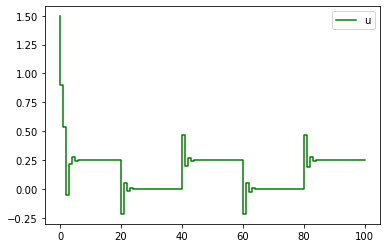

In [89]:
plt.step(np.linspace(0, 100, 101), u, 'g')
# plt.step(u[5:], 'g')
plt.legend(['u'])
plt.show()

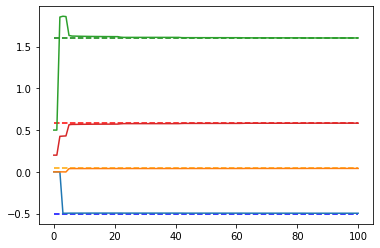

In [90]:
plt.plot(a1_est)
plt.hlines(a1_true, 0, 100, 'blue', '--')

plt.plot(a2_est)
plt.hlines(a2_true, 0, 100, 'orange', '--')

plt.plot(b0_est)
plt.hlines(b0_true, 0, 100, 'green', '--')

plt.plot(b1_est)
plt.hlines(b1_true, 0, 100, 'red', '--')
plt.show()

## 2.5 Disturbance Rejection

In [91]:
R0 = R
S0 = S
T0 = T
display(R0)
display(S0)
display(T0)
ro1, so0, so1 = sp.symbols('r_{o1},s_{o0},s_{o1}]')
x0, y0 = sp.symbols('x_0,y_0')

q + \hat{b}_1/\hat{b}_0

q*(-\hat{a}_1 + a_{m1})/\hat{b}_0 + (-\hat{a}_2 + a_{m2})/\hat{b}_0

q*(a_{m1} + a_{m2} + 1)/\hat{b}_0

In [92]:
X = q
Y = -sp.simplify(R0.subs(q, 1)/B.subs(q, 1))


Placing the integrator pole at the origin gives,

$ X = q + x_0 = q $

and we define $Y$ to be, 

$ Y = y_0 = -\frac{R^0(1)}{B(1)} = $ {{Y}}

In [93]:
Rdist = sp.simplify(X*(q + ro1) + y0*B)
Rdist = sp.collect(sp.expand(Rdist.subs(ro1, r1_sym).subs(y0, Y)), q)
Rdist

q**2 + q*(-1 + \hat{b}_1/\hat{b}_0) - \hat{b}_1/\hat{b}_0

In [94]:
Sdist = sp.simplify(X*(so0*q + so1) - y0*A)
Sdist = sp.collect(sp.expand(Sdist).subs(so0, s0_sym).subs(so1, s1_sym).subs(y0, Y), q)
Sdist_poly = sp.Poly(Sdist, q)
Sdist

\hat{a}_2/\hat{b}_0 + q**2*((-\hat{a}_1 + a_{m1})/\hat{b}_0 + 1/\hat{b}_0) + q*(\hat{a}_1/\hat{b}_0 + (-\hat{a}_2 + a_{m2})/\hat{b}_0)

In [95]:
Sdist_poly.coeffs()[0]

(-\hat{a}_1 + a_{m1} + 1)/\hat{b}_0

In [96]:
Sdist_poly.coeffs()[1]

(\hat{a}_1 - \hat{a}_2 + a_{m2})/\hat{b}_0

In [97]:
Sdist_poly.coeffs()[2]

\hat{a}_2/\hat{b}_0

In [98]:
Rdist

q**2 + q*(-1 + \hat{b}_1/\hat{b}_0) - \hat{b}_1/\hat{b}_0

In [99]:
Sdist

\hat{a}_2/\hat{b}_0 + q**2*((-\hat{a}_1 + a_{m1})/\hat{b}_0 + 1/\hat{b}_0) + q*(\hat{a}_1/\hat{b}_0 + (-\hat{a}_2 + a_{m2})/\hat{b}_0)

In [244]:
def params():
    global theta_hat, am1, am2
    rdist1 = (theta_hat[3]/theta_hat[2] - 1)
    rdist2 = -theta_hat[3]/theta_hat[2]
    sdist0 = (am1 - theta_hat[0] + 1)/(theta_hat[2])
    sdist1 = (theta_hat[0] - theta_hat[1] + am2)/theta_hat[2]
    sdist2 = theta_hat[1]/theta_hat[2]
    tdist0 = (am1 + am2 + 1)/theta_hat[2]
    
    return np.array([rdist1, rdist2, sdist0, sdist1, sdist2, tdist0]).reshape(1,-1)

In [251]:
uc = reference_signal()
v = noise_generator()
lam = 1
# Assignmnent, works
am1 = -2*np.exp(-2)
am2 = np.exp(-4)
a1_true, a2_true, b0_true, b1_true = -0.503215, 0.0497871, 1.59831, 0.587984

# # In class example, works perfectly!
# am1 = -1.3205
# am2 = 0.4966
# a1_true, a2_true, b0_true, b1_true = -1.6065, 0.6065, 0.1065, 0.0902

theta = np.array([a1_true, a2_true, b0_true, b1_true]).reshape(4,1)  # a1[0], a2[1], b0[2], b1[3]

In [258]:
# Initializing the coefficients for A, B for t = 0
theta_hat = np.array([0., 0., 0.5, 0.]).reshape(4,1)  # a1[0], a2[1], b0[2], b1[3]  ** SET b0 TO 0.01 FOR CONVERGENCE**
theta_lst = theta_hat
a1_est, a2_est, b0_est, b1_est = theta_hat[0], theta_hat[1], theta_hat[2], theta_hat[3]
P = np.diag([10, 10, 100, 10])  # WORKS 
# P = 100*np.eye(4)

# Calculating the control parameters for t = 0
yf = np.array([0] + v[0])
y = np.array([0])
vec = np.array([0., 0., -y[0], 0., 0., 0]).reshape(-1,1)
u = (params()@vec).reshape(-1)
uf = np.array([u[0]])


# Calculating the coefficients for A, B for t = 1
phi = np.array([0., 0., 0., 0.]).reshape(4,1)
yf = np.concatenate((yf, 
                    (trans(phi) @ theta + v[1] - v[0]).reshape(-1)), axis=0)
y = np.concatenate((y, 
                    (yf[1] + y[0]).reshape(-1)), axis=0)
vec = np.array([-u[0], 0., -y[1], -y[0], 0., uc[0]]).reshape(-1,1)
u = np.concatenate((u,
                    (params()@vec).reshape(-1)), axis=0)
uf = np.concatenate((uf,
                    (u[1] - u[0]).reshape(-1)), axis=0)
K = P @ phi @ inv(lam + trans(phi) @ P @ phi)
theta_hat = theta_hat + K @ (yf[1] - trans(phi) @ theta_hat)
theta_lst = np.concatenate((theta_lst, theta_hat), axis=1)
P = (np.eye(len(phi)) - K @ trans(phi)) @ P /lam

# Calculating the coefficients for A, B for t = 2
phi = np.array([-yf[0], 0., uf[0], 0.]).reshape(4,1)
yf = np.concatenate((yf, 
                    (trans(phi) @ theta + v[2] - v[1]).reshape(-1)), axis=0)
y = np.concatenate((y, 
                    (yf[2] + y[1]).reshape(-1)), axis=0)
vec = np.array([-u[1], -u[0], -y[2], -y[1], -y[0], uc[1]]).reshape(-1,1)
u = np.concatenate((u,
                    (params()@vec).reshape(-1)), axis=-1)
uf = np.concatenate((uf,
                    (u[2] - u[1]).reshape(-1)), axis=0)
K = P @ phi @ inv(lam + trans(phi) @ P @ phi)
theta_hat = theta_hat + K @ (yf[2] - trans(phi) @ theta_hat)
theta_lst = np.concatenate((theta_lst, theta_hat), axis=1)
P = (np.eye(len(phi)) - K @ trans(phi)) @ P /lam
phi = np.array([-yf[1], -yf[0], uf[1], uf[0]]).reshape(4,1)

for t in np.arange(3, 101): 
    # Calculating the coefficients for A, B for t = 2
    yf = np.concatenate((yf, 
                        (trans(phi) @ theta + v[t] - v[t-1]).reshape(-1)), axis=0)
    y = np.concatenate((y, 
                        (yf[t] + y[t-1]).reshape(-1)), axis=0)
    vec = np.array([-u[t-1], -u[t-2], -y[t], -y[t-1], -y[t-2], uc[t-1]]).reshape(-1,1)
    u = np.concatenate((u,
                        (params()@vec + v[t]).reshape(-1)), axis=0)
    uf = np.concatenate((uf,
                    (u[t] - u[t-1]).reshape(-1)), axis=0)
    K = P @ phi @ inv(lam + trans(phi) @ P @ phi)
    theta_hat = theta_hat + K @ (yf[t] - trans(phi) @ theta_hat)
    theta_lst = np.concatenate((theta_lst, theta_hat), axis=1)
    P = (np.eye(len(phi)) - K @ trans(phi)) @ P /lam
    phi = np.array([-yf[t-1], -yf[t-2], uf[t-1], uf[t-2]]).reshape(4,1)

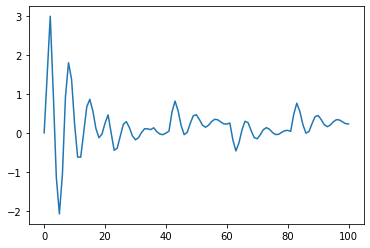

In [259]:
plt.plot(u)
plt.show()

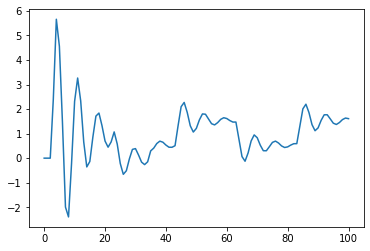

In [260]:
plt.plot(y)
plt.show()

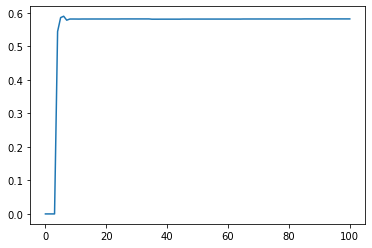

In [264]:
plt.plot(theta_lst[3])

In [256]:
theta_hat

array([[-0.50356921],
       [ 0.0545673 ],
       [ 1.59662105],
       [ 0.58198971]])

In [266]:
theta

array([[-0.503215 ],
       [ 0.0497871],
       [ 1.59831  ],
       [ 0.587984 ]])

# Question 3

## Q3.1 Derivation of Control Parameters Direct Self-Tuning Regulator

Given that the system is the same as in the previous question, the control parameters for the direct self-tuning regulator will also be the same. To find the reparameterized model, we look into the equation, 

$$ A_oA_my(t) = B^-\big(Ru(t) + Sy(t)\big) $$

From the previous example, we know the following, 

$ A_0 = 1 $ 

$ A_m = $ {{Am}}

$ B^- = $ {{B_minus}}

$ R = q + r_1 = $  {{R}}

$ S = s_0q + s_1 = $ {{S}}

$ T = t_0q = $ {{T}}

Then the equation above becomes, 

$$ y(t) = \frac{1}{q^2 + a_{m_1}q + a_{m_2}} \hat{b}_0\Big(\big(q + r_1\big)u(t) + \big(s_0q + s_1\big)y(t)\Big) $$

Commented out vv
<!-- $$ y(t) = \frac{1}{q^2 + a_{m_1}q + a_{m_2}} \Big(\big(\hat{b}_0q + \hat{b}_1\big)u(t) + \big((a_{m_1} - \hat{a}_1)q + (a_{m_2} - \hat{a}_2)y(t)\Big) $$ -->
^^

To ensure that we are working in the backwords shift operator, we multiply the top and bottom of the equation by $q^{-2}$. Then, 

$$ y(t) = \frac{1}{1 + a_{m_1}q^{-1} + a_{m_2}q^{-2}} \Big(\big(\hat{b}_0q^{-1} + \hat{b}_0r_1q^{-2}\big)u(t) + \big(\hat{b}_0s_0q^{-1} + \hat{b}_0s_1q^{-2}\big)y(t)\Big) $$

Then by distributing the outermost bracket into the inputs and outputs, $u(t)$ and $y(t)$ respectively, the output may be written as, 

$$ y(t) = \Big(\big(\hat{b}_0q^{-1} + \hat{b}_0r_1q^{-2}\big)u_f(t) + \big(\hat{b}_0s_0q^{-1} + \hat{b}_0s_1q^{-2}\big)y_f(t)\Big) $$

where, 

$$ u_f(t) = \frac{1}{1 + a_{m_1}q^{-1} + a_{m_2}q^{-2}} u(t) $$

$$ y_f(t) = \frac{1}{1 + a_{m_1}q^{-1} + a_{m_2}q^{-2}} y(t) $$

Expanding these equations we get,

$$ u_f(t) = u(t) - a_{m_1}u_f(t-1) - a_{m_2}u_f(t-2) $$

and 

$$ y_f(t) = u(t) - a_{m_1}y_f(t-1) - a_{m_2}y_f(t-2) $$

Recalling the output of the system we can redefine it to be, 

$$ y(t) = \hat{b}_0u_f(t-1) + \hat{b}_0r_1u_f(t-2) + \hat{b}_0s_0y_f(t-1) + \hat{b}_0s_1y_f(t-2) = \phi(t-1)^T\theta $$

with, 

$ \phi(t) = \big[u_f(t)\ u_f(t-1)\ y_f(t)\ y_f(t-1)\big]^T $

and 

$\theta = \big[\hat{r}_0\ \hat{r}_1\ \hat{s}_0\ \hat{s}_1 \big]^T$

With these known, we can use the recursive linear regressor to approximate the parameters for $\theta$ 

$ S = $ {{S}}

$ R = $ {{R}}

$ T = $ {{T}}

$ \theta = $ {{sp.Matrix([theta[0], theta[1], theta[2], theta[3]])}}

## Q3.2 Implementation of Direct Self-Tuning Regulator

In [56]:
uc = reference_signal()
lam = 1

# Assignmnent, works
am1 = -2*np.exp(-2)
am2 = np.exp(-4)
r0_true, r1_true, s0_true, s1_true = 1.59831, 0.587984, 0.23254443, -0.03147146
t0_true = 1 + am1 + am2
t0 = t0_true

theta = np.array([r0_true, r1_true, s0_true, s1_true]).reshape(4,-1)

In [57]:
# Initializing the coefficients for R, S for t = 0
y = np.array([0])
theta_hat = np.array([1., 0.25, 0.25, 0.25]).reshape(4,-1)
theta_lst = np.array(theta_hat)
# P = np.diag([1000, 100, 1000, 1000])  # WORKS 
P = 100*np.eye(4)

# Calculating the control parameters for t = 0
u = 1/theta_hat[0]*(t0*uc[0] - theta_hat[2]*y[0])
uf = np.array([u[0]])
yf = np.array([y[0]])



# Initializing the coefficients for A, B for t = 1
phi = np.array([0., 0., 0., 0.]).reshape(4,-1)
y = np.concatenate((y, 
                   (trans(phi)@theta).reshape(-1,)), axis=0)
K = P @ phi @ inv(lam + trans(phi) @ P @ phi)
theta_hat = theta_hat + K @ (y[1] - trans(phi) @ theta_hat)
theta_lst = np.concatenate((theta_lst, theta_hat), axis=1)
P = (np.eye(len(phi)) - K @ trans(phi)) @ P /lam

# Calculating the control parameters for t = 1
u = np.concatenate((u, 
                   (1/theta_hat[0]*(-theta_hat[1]*u[0] + t0*uc[1] - theta_hat[2]*y[1] - theta_hat[3]*y[0])).reshape(-1,)),
                    axis=0)
uf = np.concatenate((uf,
                     (u[1] - am1*uf[0]).reshape(-1,)), axis=0)
yf = np.concatenate((yf,
                     (y[1] - am1*yf[0]).reshape(-1,)), axis=0)

phi = np.array([uf[1], 0., yf[1], 0.]).reshape(4,-1)
for t in np.arange(2, 101):
    # Initializing the coefficients for A, B for t = t
    y = np.concatenate((y, 
                       (trans(phi)@theta).reshape(-1,)), axis=0)
    K = P @ phi @ inv(lam + trans(phi) @ P @ phi)
    theta_hat = theta_hat + K @ (y[t] - trans(phi) @ theta_hat)
    theta_lst = np.concatenate((theta_lst, theta_hat), axis=1)
    P = (np.eye(len(phi)) - K @ trans(phi)) @ P /lam

    # Calculating the control parameters for t = t
    u = np.concatenate((u, 
                       (1/theta_hat[0]*(-theta_hat[1]*u[t-1] + t0*uc[t] - theta_hat[2]*y[t] - theta_hat[3]*y[t-1])).reshape(-1,)),
                       axis=0)
    uf = np.concatenate((uf,
                         (u[t] - am1*uf[t-1] - am2*uf[t-2]).reshape(-1,)), axis=0)
    yf = np.concatenate((yf,
                         (y[t] - am1*yf[t-1] - am2*yf[t-2]).reshape(-1,)), axis=0)
    phi = np.array([uf[t-1], uf[t-2], yf[t-1], yf[t-2]]).reshape(4,-1)
    

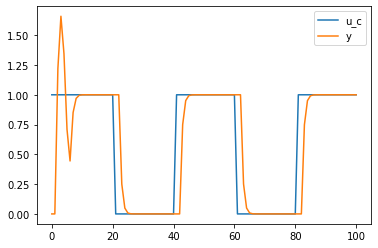

In [58]:
plt.plot(uc)
plt.plot(y)
plt.legend(['u_c', 'y'])
plt.show()

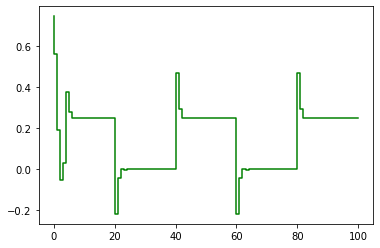

In [59]:
plt.step(np.linspace(0, 100, 101), u, 'g')
plt.show()

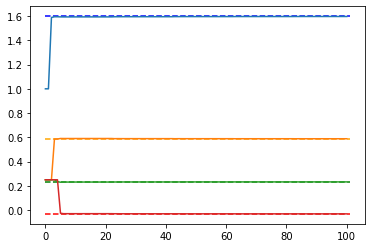

In [60]:
a, b = theta_lst.shape
colours = ['blue', 'orange', 'green', 'red']
for idx, th in enumerate(theta_lst):
    plt.plot(th)
    plt.hlines(theta[idx], 0, b, colours[idx], '--')
plt.show()